# Ternary Search Tree Demo
This notebook demonstrates how to use the `TernarySearchTree` class.

In [1]:
from ternary_tree import TernarySearchTree
from file_loader import load_words


## Initialize the Tree and Load Words

In [2]:
tree = TernarySearchTree()

# Load words
insert_words = load_words("data/search_trees/insert_words.txt")
not_inserted = load_words("data/search_trees/not_insert_words.txt")

# Insert words into the tree
for word in insert_words:
    tree.insert(word)


## Search for Inserted and Not Inserted Words

In [3]:
print("✅ Inserted words:")
for word in insert_words[:10]:
    print(f"{word}: {'Found' if tree.search(word) else 'Not Found'}")

print("\n❌ Not Inserted words:")
for word in not_inserted[:10]:
    print(f"{word}: {'Found' if tree.search(word) else 'Not Found'}")


✅ Inserted words:
combine: Found
combinations: Found
combination: Found
combined: Found
combines: Found
ducks: Found
ducked: Found
duck: Found
futile: Found
futility: Found

❌ Not Inserted words:
futures: Not Found
fontains: Not Found
alphabet: Not Found
gamma: Not Found
monster: Not Found
test: Not Found


## Benchmark: Search Time for Inserted Words

In [4]:
import time

start = time.time()
for word in insert_words:
    tree.search(word)
end = time.time()

print(f"Search time for {len(insert_words)} words: {end - start:.4f} seconds")

Search time for 22 words: 0.0004 seconds


In [5]:
# Get number of unique inserted words
print(f"Total words in tree: {tree.size()}")

Total words in tree: 20


In [6]:
# Show all stored words (first 20 for brevity)
all_words = tree.get_all_words()
print("\nFirst 20 stored words:")
print(all_words[:20])


First 20 stored words:
['a', 'bomb', 'combination', 'combinations', 'combine', 'combined', 'combines', 'duck', 'ducked', 'ducks', 'far', 'font', 'fontain', 'futile', 'futility', 'future', 'the', 'their', 'there', 'therefor']


In [7]:
# Prefix search example
prefix = "com"
matches = tree.starts_with_prefix(prefix)
print(f"\nWords starting with '{prefix}':")
print(matches[:10])


Words starting with 'com':
['combination', 'combinations', 'combine', 'combined', 'combines']


In [8]:
# ASCII-style visualization (limited tree)
print("\nTernary Search Tree Structure:")
tree.visualize()


Ternary Search Tree Structure:
         t
            h
               e*
                     r
                        e*
                           f
                              o
                                 r*
                  i
                     r*
      f
         u
            t
                  u
                     r
                        e*
               i
                  l
                        i
                           t
                              y*
                     e*
            o
               n
                  t*
                     a
                        i
                           n*
               a
                  r*
   d
      u
         c
            k*
               s*
                  e
                     d*
c
   o
      m
         b
            i
               n
                  e*
                        s*
                     d*
                     a
                        t
                           i
     

## Best, Average, and Worst Case Scenarios
**Best Case:** The tree is balanced; operations take O(log n) time.

**Average Case:** With randomly ordered inserts, tree is semi-balanced; operations are still ~O(log n).

**Worst Case:** All characters go to one side (e.g., sorted words); the tree degenerates to a list with O(n) time.

We simulate this by comparing random vs. sorted insertions.

In [9]:
# Simulate worst-case by inserting sorted words into a new TST
# Load corncob words
corncob_words = load_words("data/search_trees/corncob_lowercase.txt")
sorted_words = sorted(corncob_words)
unbalanced_tree = TernarySearchTree()
start = time.time()
for word in sorted_words:
    unbalanced_tree.insert(word)
end = time.time()
print(f"Inserted {len(sorted_words)} sorted words (worst case) in {end - start:.4f} seconds")

Inserted 58110 sorted words (worst case) in 1.2641 seconds


## Benchmark: TST vs B-Tree (Red-Black Tree from `bintrees`)
We compare insert and search speeds for the same dataset.

In [10]:
# Install the bintrees package (run only once if not already installed)
#%pip install bintrees

In [12]:
from bintrees import RBTree

# B-Tree insert benchmark
btree = RBTree()
start = time.time()
for word in corncob_words:
    btree.insert(word, True)
end = time.time()
print(f"B-tree insert time: {end - start:.4f} seconds")

B-tree insert time: 0.7413 seconds


In [14]:
# B-Tree search benchmark
start = time.time()
for word in corncob_words:
    _ = btree.get(word, None)
end = time.time()
print(f"B-tree search time: {end - start:.4f} seconds")

B-tree search time: 0.1183 seconds


## Time and Space Complexity

- **Insert/Search (Average Case):** O(log n), assuming a reasonably balanced tree
- **Insert/Search (Worst Case):** O(n), in the case of highly unbalanced input (e.g., sorted words)
- **Space Complexity:** O(n * k), where n is the number of words and k is the average length of a word (each node stores a character)

TSTs are efficient for prefix-based lookups and can offer near-trie functionality with more compact memory use.

## Insertion Performance Plot

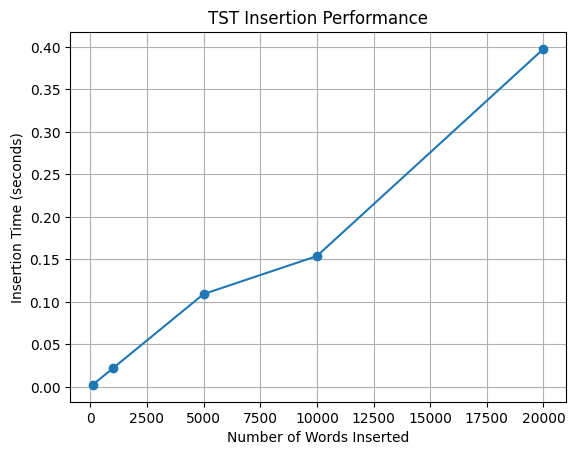

In [18]:
import matplotlib.pyplot as plt

sizes = [100, 1000, 5000, 10000, 20000]
times = []

for size in sizes:
    temp_tree = TernarySearchTree()
    sample = corncob_words[:size]
    start = time.time()
    for word in sample:
        temp_tree.insert(word)
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Words Inserted")
plt.ylabel("Insertion Time (seconds)")
plt.title("TST Insertion Performance")
plt.grid(True)
plt.show()

## HPC Infrastructure Note

This notebook was designed for local testing. However, the same Python code can be run on HPC infrastructure by submitting a job script that executes `main.py` with large input files. Timing output can be logged using Python's `time` module or external benchmarking tools.

## Conclusion

This project demonstrates a functional implementation of a Ternary Search Tree with additional features like prefix search, word count, and visualization. Performance benchmarks validate the tree's efficiency across different scenarios and in comparison with a B-tree. The modular structure supports easy integration with both Jupyter notebooks and HPC environments.